# Image Denoising

Contents:
- Median Filter
- Gaussian Filter

Author: Abijith J. Kamath
https://kamath-abhijith.github.io

In [95]:
import numpy as np
import cv2

from skimage import io
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

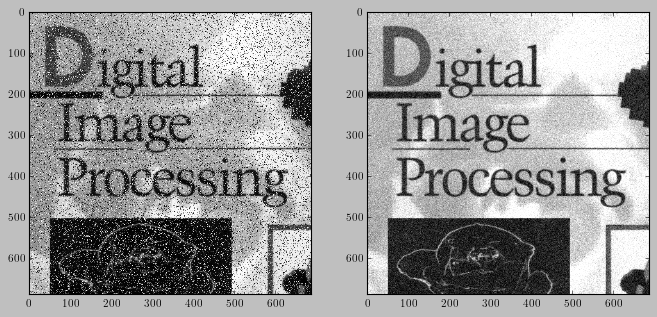

In [31]:
## READ AND DISPLAY IMAGES

noisy1 = io.imread('noisy-book1.png', 0)
noisy2 = io.imread('noisy-book2.png', 0)

style.use('classic')
rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(1,2,figsize=(10,6))
plts[0].imshow(noisy1, vmin=0, vmax=255, cmap='gray')
# plts[0].set_title(r", $\sigma=1$")

plts[1].imshow(noisy2, vmin=0, vmax=255, cmap='gray')
# plts[1].set_title(r"Medium Noise, $\sigma=5$")

plt.show()

## Median and Gaussian Filtering

In [32]:
## FUNCTION DEFINITON :: MEDIAN AND GAUSSIAN FILTERING

def gaussian_filter(image, kernel_size, var):
    m = kernel_size[0]
    n = kernel_size[1]
    gaussian_matrix = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            d = (i-m/2)**2 + (j-n/2)**2
            gaussian_matrix[i,j] = np.exp(-d/(2*var**2))

    return signal.convolve2d(image, gaussian_matrix, mode='same', boundary='fill', fillvalue=0)

def median_filter(image):
    m,n = image.shape
    
    out_image = np.zeros(image.shape)
    window = np.zeros(9)
    for i in range(image.shape[0]-1):
        for j in range(image.shape[1]-1):
            window[0] = image[i-1,j-1]
            window[1] = image[i-1,j]
            window[2] = image[i-1,j+1]
            window[3] = image[i,j-1]
            window[4] = image[i,j]
            window[5] = image[i,j+1]
            window[6] = image[i+1,j-1]
            window[7] = image[i+1,j]
            window[8] = image[i+1,j+1]

            window.sort()
            out_image[i,j] = window[4]

    return out_image

In [33]:
## MAIN :: MEDIAN AND GAUISSIAN FILTERING

noisy1_median = median_filter(noisy1)

kernel_size = (3,3)
var = 1000
noisy1_gaussian = gaussian_filter(noisy1, kernel_size, var)

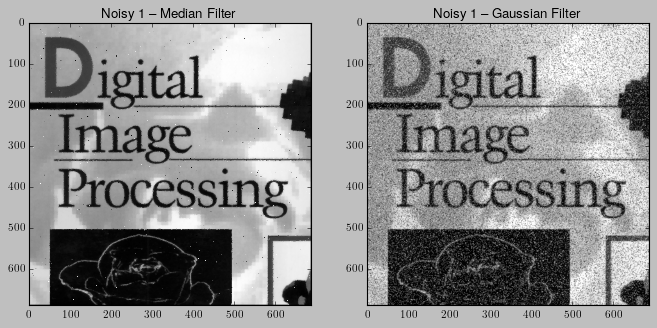

In [37]:
## PLOTS :: MEDIAN AND GAUSSIAN FILTERING

fig, plts = plt.subplots(1,2,figsize=(10,6))
plts[0].imshow(noisy1_median, cmap='gray')
plts[0].set_title(r"Noisy 1 -- Median Filter")

plts[1].imshow(noisy1_gaussian, cmap='gray')
plts[1].set_title(r"Noisy 1 -- Gaussian Filter")

plt.show()

## Bilateral and Non-Local Means

In [50]:
## FUNCTION DEFINITION :: BILATERAL AND NON-LOCAL MEANS

def distance(x,y, i,j):
    return np.sqrt((x-i)**2 + (y-j)**2)

def gaussian(x, sigma):
    return np.exp(-x**2/(2.0*sigma**2))/(np.sqrt(2.0*np.pi*sigma**2))

def bilateral_step(image, filtered_image, x, y, diameter, sigma_i, sigma_s):
    hl = diameter/2
    i_filtered = 0
    Wp = 0
    i = 0
    while i < diameter:
        j = 0
        while j < diameter:
            neighbour_x = x - (hl - i)
            neighbour_y = y - (hl - j)
            if neighbour_x >= len(image):
                neighbour_x -= len(image)
            if neighbour_y >= len(image[0]):
                neighbour_y -= len(image[0])
            gi = gaussian(image[int(neighbour_x)][int(neighbour_y)] - image[x][y], sigma_i)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_s)
            w = gi * gs
            i_filtered += image[int(neighbour_x)][int(neighbour_y)] * w
            Wp += w
            j += 1
        i += 1
    i_filtered = i_filtered / Wp
    filtered_image[x][y] = int(round(i_filtered))

def bilateral_filter(image, filter_diameter, sigma_i, sigma_s):
    filtered_image = np.zeros(image.shape)

    i = 0
    while i < len(image):
        j = 0
        while j < len(image[0]):
            bilateral_step(image, filtered_image, i, j, filter_diameter, sigma_i, sigma_s)
            j += 1
        i += 1
    return filtered_image

def nonlocal_means(image):
    return

In [79]:
## MAIN :: BILATERAL FILTER AND NONLOCAL MEANS

sigma_i = 5.0
sigma_s = 5.0
radius = 10.0
noisy2_bilateral = bilateral_filter(noisy2, radius, sigma_i, sigma_s)

kernal_size = (3,3)
var = 5
noisy2_gaussian = gaussian_filter(noisy2, kernel_size, var)

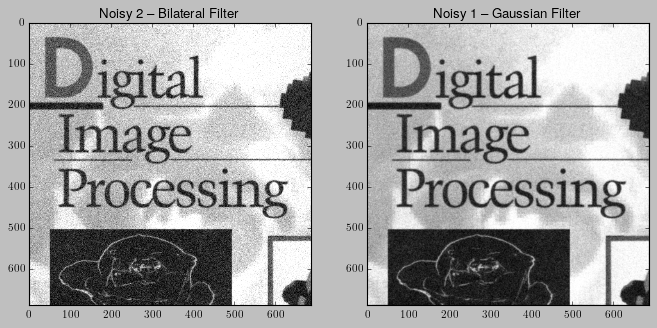

In [78]:
## PLOT :: BILATERAL AND NONLOCAL MEANS

fig, plts = plt.subplots(1,2,figsize=(10,6))
plts[0].imshow(noisy2_bilateral, cmap='gray')
plts[0].set_title(r"Noisy 2 -- Bilateral Filter")

plts[1].imshow(noisy2_gaussian, cmap='gray')
plts[1].set_title(r"Noisy 1 -- Gaussian Filter")

plt.show()

## Decimation and Filtering

In [68]:
## FUNCTION DEFINITION :: DECIMATION

def decimate_image(image, decimation_factor):
    m,n = image.shape
    return image[0:m:decimation_factor, 0:n:decimation_factor]

In [98]:
## MAIN :: DECIMATION

image = io.imread('barbara.tif', 0)

decimation_factor = 2
decimated_image = decimate_image(image, decimation_factor)

var = 2
kernel_size = (3,3)
decimated_image_postp = decimate_image(gaussian_filter(image, kernel_size, var), decimation_factor)

resized_image = cv2.resize(image, dsize=(int(image.shape[1]/decimation_factor), int(image.shape[0]/decimation_factor)), interpolation=cv2.INTER_CUBIC)

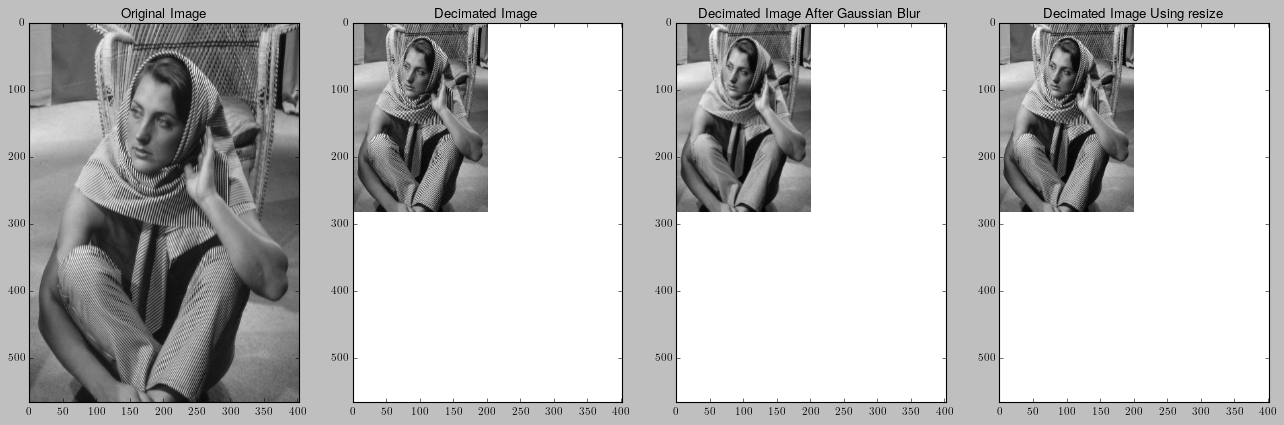

In [99]:
## PLOTS :: DECIMATION

fig, plts = plt.subplots(1,4,figsize=(20,6))
plts[0].imshow(image, cmap='gray')
plts[0].set_xlim([0,image.shape[1]])
plts[0].set_ylim([image.shape[0],0])
plts[0].set_title(r"Original Image")

plts[1].imshow(decimated_image, cmap='gray')
plts[1].set_xlim([0,image.shape[1]])
plts[1].set_ylim([image.shape[0],0])
plts[1].set_title(r"Decimated Image")

plts[2].imshow(decimated_image_postp, cmap='gray')
plts[2].set_xlim([0,image.shape[1]])
plts[2].set_ylim([image.shape[0],0])
plts[2].set_title(r"Decimated Image After Gaussian Blur")

plts[3].imshow(resized_image, cmap='gray')
plts[3].set_xlim([0,image.shape[1]])
plts[3].set_ylim([image.shape[0],0])
plts[3].set_title(r"Decimated Image Using resize")

plt.show()